In [2]:
from PIL import Image
from collections import defaultdict
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from data import data_manager
from config.config_manager import _C as cfg, build_output
from tools.logger import setup_logger
logger = setup_logger(".")
cfg.merge_from_file("../reid.yml")

cfg.DATASET.TRAIN_PATH = "/media/allen/mass/reid/"
cfg.DATASET.NAME = 'cuhk02'
cfg.TRANSFORM.AUGMENT = True
cfg.PAR.IGNORE_CAT = [13]
cfg.PAR.SELECT_CAT = -1
par_dataset = get_img_data(cfg)

2019-11-06 16:28:33,401 logger INFO: => Market1501 loaded
2019-11-06 16:28:33,401 logger INFO: Dataset statistics:
2019-11-06 16:28:33,402 logger INFO:   ------------------------------
2019-11-06 16:28:33,403 logger INFO:   subset   | # ids | # images
2019-11-06 16:28:33,403 logger INFO:   ------------------------------
2019-11-06 16:28:33,404 logger INFO:   train    |  1816 |     7264
2019-11-06 16:28:33,405 logger INFO:   query    |     0 |        0
2019-11-06 16:28:33,405 logger INFO:   gallery  |     0 |        0
2019-11-06 16:28:33,406 logger INFO:   ------------------------------
2019-11-06 16:28:33,407 logger INFO:   total    |  1816 |     7264
2019-11-06 16:28:33,408 logger INFO:   ------------------------------


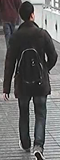

In [2]:
path = par_dataset.train[1000][0]
img = Image.open(path)
img

In [3]:
from data.transforms import ReID_Augment
from PIL import Image, ImageOps, ImageEnhance
import torchvision.transforms as T
trans = ReID_Augment(0, 1)

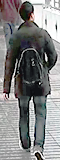

In [27]:
# bimg = ImageEnhance.Brightness(img).enhance(0.9)
trans(img)

In [6]:
REID_CANDIDATES

NameError: name 'REID_CANDIDATES' is not defined

In [2]:
from data.build_loader import build_reid_loader
loader = build_reid_loader(cfg)

2019-11-06 13:48:05,151 logger INFO: => CUHK01 loaded
2019-11-06 13:48:05,152 logger INFO: Dataset statistics:
2019-11-06 13:48:05,153 logger INFO:   ------------------------------
2019-11-06 13:48:05,153 logger INFO:   subset   | # ids | # images
2019-11-06 13:48:05,154 logger INFO:   ------------------------------
2019-11-06 13:48:05,156 logger INFO:   train    |   971 |     3884
2019-11-06 13:48:05,157 logger INFO:   query    |     0 |        0
2019-11-06 13:48:05,157 logger INFO:   gallery  |     0 |        0
2019-11-06 13:48:05,158 logger INFO:   ------------------------------
2019-11-06 13:48:05,159 logger INFO:   total    |   971 |     3884
2019-11-06 13:48:05,160 logger INFO:   ------------------------------


In [3]:
batch = next(iter(loader[0]))

In [4]:
batch[0].shape

torch.Size([128, 3, 384, 128])

In [6]:
img.convert("L").histogram()

[4,
 4,
 2,
 5,
 5,
 4,
 5,
 6,
 12,
 12,
 6,
 11,
 9,
 11,
 8,
 10,
 11,
 14,
 9,
 18,
 17,
 12,
 9,
 13,
 16,
 16,
 20,
 25,
 21,
 17,
 23,
 28,
 30,
 40,
 46,
 77,
 119,
 203,
 287,
 199,
 280,
 308,
 252,
 201,
 188,
 143,
 144,
 164,
 130,
 127,
 101,
 114,
 109,
 117,
 107,
 102,
 71,
 53,
 63,
 61,
 71,
 59,
 49,
 40,
 46,
 31,
 44,
 46,
 33,
 36,
 28,
 24,
 24,
 34,
 20,
 23,
 21,
 23,
 19,
 25,
 20,
 15,
 18,
 17,
 18,
 13,
 19,
 21,
 12,
 27,
 20,
 19,
 12,
 11,
 20,
 15,
 9,
 7,
 10,
 11,
 7,
 15,
 17,
 15,
 17,
 10,
 14,
 16,
 16,
 14,
 11,
 18,
 20,
 15,
 11,
 20,
 24,
 20,
 23,
 23,
 23,
 28,
 33,
 35,
 28,
 28,
 42,
 37,
 44,
 46,
 43,
 55,
 57,
 45,
 55,
 48,
 44,
 51,
 44,
 50,
 63,
 51,
 53,
 54,
 58,
 58,
 53,
 64,
 76,
 51,
 62,
 50,
 62,
 45,
 57,
 50,
 47,
 60,
 48,
 44,
 42,
 43,
 59,
 55,
 47,
 49,
 46,
 41,
 42,
 25,
 32,
 32,
 23,
 31,
 33,
 25,
 30,
 33,
 30,
 25,
 33,
 41,
 44,
 34,
 38,
 21,
 32,
 34,
 31,
 31,
 22,
 34,
 25,
 22,
 28,
 21,
 28,
 31,
 33,
 

In [42]:
import numpy as np
np.random.randint(0, 2, 1)

array([1])

In [11]:
cfg.SOLVER.CUSTOM

(['bn', 'wd', 0.0],)

In [8]:
for a, b, c in ():
    
    print(a,b,c)

In [9]:
((1))

1

In [2]:
from data.build_data import build_par_dataset
from data.build_transform import build_transform
from data.sampler import BlancedPARSampler
from torch.utils import data

In [3]:
dataset = par_dataset
train_trans = build_transform(cfg)
val_trans = build_transform(cfg, isTrain=False)

train_dataset = build_par_dataset(dataset.train, train_trans)
val_dataset = build_par_dataset(dataset.val, val_trans)

num_workers = cfg.DATALOADER.NUM_WORKERS
par_sampler = BlancedPARSampler(dataset)
t_loader = data.DataLoader(
    train_dataset, batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True, 
    sampler=par_sampler
)

In [ ]:
img, label = next(iter(t_loader))

In [15]:
len(t_loader)

2833

In [ ]:
for i, name in enumerate(par_dataset.category_names[:-1]):
    print((label[:,i]==1).sum(), (label[:,i]==0).sum())

In [41]:
par_dataset.train[19]

('/media/allen/mass/PAR_ATTR/train/0/000002__0_0_0_0_0_-1_-1_0_0_0_0_0_1.png',
 [-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [26]:
a = [-1]*12
a[0] = 1

In [27]:
a

[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [42]:
import numpy as np
class_indice = []
attrs = []
for i, (_, label) in enumerate(par_dataset.train):
    attrs.append(label)   
    class_indice.append(i) 

attrs = np.array(attrs)
class_indice = np.array(class_indice)


In [44]:
pool = {}
for i, name in enumerate(par_dataset.category_names[:-1]):
    pool[name] = {}
    pool[name]['p'] = class_indice[attrs[:,i]==1]
    pool[name]['n'] = class_indice[attrs[:,i]==0]

In [48]:
count = 0
for i, name in enumerate(par_dataset.category_names[:-1]):
    count += pool[name]['p'].shape[0]

In [49]:
count/12

30211.583333333332

In [50]:
pools = []
count = 0
for i, name in enumerate(par_dataset.category_names[:-1]):
    count += pool[name]['p'].shape[0]
size = int(count / 12)
for i, name in enumerate(par_dataset.category_names[:-1]):
    for cat in pool[name].keys():
        if cat == 'p':
            if size > len(pool[name]['p']):
                pools.extend(np.random.choice(pool[name][cat], size=size, replace=True).tolist())
            else:
                pools.extend(np.random.choice(pool[name][cat], size=size, replace=False).tolist())
        else:
            if size > len(pool[name]['n']):
                pools.extend(np.random.choice(pool[name][cat], size=size, replace=True).tolist())
            else:
                pools.extend(np.random.choice(pool[name][cat], size=size, replace=False).tolist())

In [51]:
for i, name in enumerate(par_dataset.category_names[:-1]):
    print(len(pool[name]['p']), len(pool[name]['n']))

93991 86713
27377 127783
6341 116883
10031 158073
4932 174687
91071 83161
22860 153455
23476 147618
17123 163441
15799 165453
17761 163177
31777 148648


In [52]:
import random
random.shuffle(pools)

In [56]:
np.random.randint(0, len(pools), 256)

array([582517, 319044, 347235, 149860, 444411, 289419, 207805, 481138,
       530414, 370216])

In [65]:
labels = []
for i in np.random.randint(0, len(pools), 1000):
    labels.append(par_dataset.train[pools[i]][1])

In [66]:
for i, name in enumerate(par_dataset.category_names[:-1]):
    print((np.array(labels)[:,i]==1).sum(), (np.array(labels)[:,i]==0).sum())

36 38
30 37
44 53
40 47
42 44
46 42
47 35
53 45
46 25
36 36
41 52
51 34


In [14]:
np.random.choice(idxs, size=self.num_instances, replace=True)

(182020, 13)

In [15]:
class_indice.shape

(182020,)

In [10]:
build_output(cfg, '../par.yml')

In [7]:
import os
os.makedirs(cfg.OUTPUT_DIR)

'par/OSNet_par_gender_bce_SGD_lr_0.001_warmup_10_0.01_plateau_10_flip_crop_imagenet/2019-10-21_10-10-46'

In [83]:
par_dataset.train[0]

('/media/allen/mass/PAR_ATTR/train/0/000000__0_0_-1_0_0_0_-1_-1_0_0_0_0_1.png',
 [0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 1])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
attrs = []
with open('../caffe_models/orig_path.txt', 'r') as f:
    for line in f.readlines():
        line = line.strip().split("__")[-1].split(".")[0].split("_")

        label = [int(i) for i in line]
        attrs.append(label) 
attr_data_orig = np.array(attrs)

In [86]:
attrs = []
for _, label in par_dataset.train:
    attrs.append(label)    

attr_data = np.array(attrs)

In [87]:
attr_data

array([[ 0,  0, -1, ...,  0,  0,  1],
       [ 0, -1, -1, ...,  0,  0,  1],
       [ 0,  0,  0, ...,  0,  0,  1],
       ...,
       [ 1,  0,  0, ...,  1,  0,  1],
       [ 1, -1, -1, ...,  0,  0,  1],
       [ 0,  1,  0, ...,  0,  0,  1]])

In [88]:
counts = []
for i in range(attr_data.shape[1]):
    count = []
    count.append((attr_data[:,i] == -1).sum())
    count.append((attr_data[:,i] == 1).sum())
    count.append((attr_data[:,i] == 0).sum())
    counts.append(count)

counts = np.array(counts)

counts_orig = []
for i in range(attr_data_orig.shape[1]):
    count = []
    count.append((attr_data_orig[:,i] == -1).sum())
    count.append((attr_data_orig[:,i] == 1).sum())
    count.append((attr_data_orig[:,i] == 0).sum())
    counts_orig.append(count)

counts_orig = np.array(counts_orig)

In [90]:
counts

array([[  1316,  93991,  86713],
       [ 26860,  27377, 127783],
       [ 58796,   6341, 116883],
       [ 13916,  10031, 158073],
       [  2401,   4932, 174687],
       [  7788,  91071,  83161],
       [  5705,  22860, 153455],
       [ 10926,  23476, 147618],
       [  1456,  17123, 163441],
       [   768,  15799, 165453],
       [  1082,  17761, 163177],
       [  1595,  31777, 148648],
       [  8176, 139285,  34559]])

In [89]:
counts.cumsum(axis=1)

array([[  1316,  95307, 182020],
       [ 26860,  54237, 182020],
       [ 58796,  65137, 182020],
       [ 13916,  23947, 182020],
       [  2401,   7333, 182020],
       [  7788,  98859, 182020],
       [  5705,  28565, 182020],
       [ 10926,  34402, 182020],
       [  1456,  18579, 182020],
       [   768,  16567, 182020],
       [  1082,  18843, 182020],
       [  1595,  33372, 182020],
       [  8176, 147461, 182020]])

In [75]:
counts_orig.cumsum(axis=1)

array([[  3757,  96544, 182020],
       [131378, 145222, 182020],
       [141934, 148275, 182020],
       [ 76772,  86803, 182020],
       [140242, 142046, 182020],
       [ 51861, 116099, 182020],
       [ 51324,  72677, 182020],
       [ 59581,  80162, 182020],
       [ 44264,  60379, 182020],
       [ 20841,  36343, 182020],
       [ 51053,  68736, 182020],
       [ 31619,  62676, 182020],
       [ 96202, 150988, 182020]])

In [74]:
counts_orig

array([[  3757,  92787,  85476],
       [131378,  13844,  36798],
       [141934,   6341,  33745],
       [ 76772,  10031,  95217],
       [140242,   1804,  39974],
       [ 51861,  64238,  65921],
       [ 51324,  21353, 109343],
       [ 59581,  20581, 101858],
       [ 44264,  16115, 121641],
       [ 20841,  15502, 145677],
       [ 51053,  17683, 113284],
       [ 31619,  31057, 119344],
       [ 96202,  54786,  31032]])

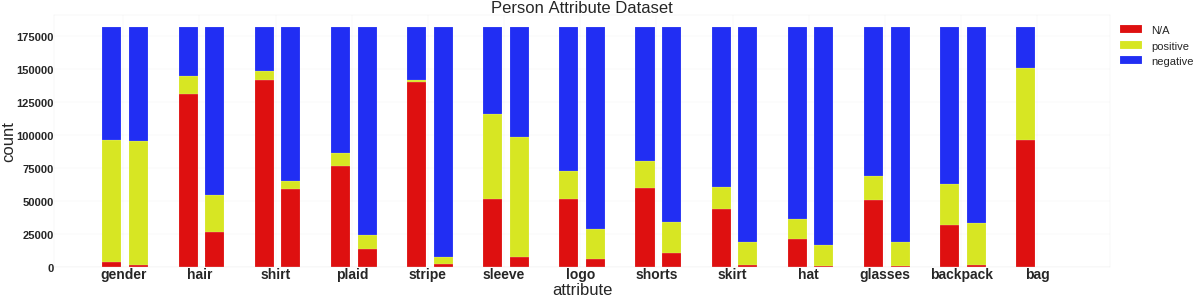

In [91]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,figsize=(120,30), dpi=10)
 
# The position of the bars on the x-axis
r = np.arange(attr_data.shape[1])
 
# Names of group and bar width
names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
         'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack', 'bag']
barWidth = 0.5

cumsums = counts.cumsum(axis=1)
cumsums_orig = counts_orig.cumsum(axis=1)
cumsums[-1,:] = 0
counts[-1,:] = 0

# Create brown bars
plt.bar(r, counts_orig[:,0], color='#de1010', edgecolor='white', width=barWidth/2, label="N/A")
plt.bar(r, counts_orig[:,1], bottom=cumsums_orig[:,0], color='#d7e623', edgecolor='white', width=barWidth/2, label="positive")
plt.bar(r, counts_orig[:,2], bottom=cumsums_orig[:,1], color='#212ef3', edgecolor='white', width=barWidth/2, label="negative")
plt.bar(r + barWidth/2 + 0.1, counts[:,0], color='#de1010', edgecolor='white', width=barWidth/2)
plt.bar(r + barWidth/2 + 0.1, counts[:,1], bottom=cumsums[:,0], color='#d7e623', edgecolor='white', width=barWidth/2)
plt.bar(r + barWidth/2 + 0.1, counts[:,2], bottom=cumsums[:,1], color='#212ef3', edgecolor='white', width=barWidth/2)

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 80})
plt.xticks((r + barWidth/2 - 0.1), names, rotation=0, ha="center",
             rotation_mode="anchor", fontsize=100, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=80, fontweight='bold')
plt.xlabel("attribute", fontsize=120)
plt.ylabel("count", fontsize=120)
plt.title("Person Attribute Dataset", fontsize=120)
# ax.autoscale_view()
fig.tight_layout()

In [2]:
old_p = np.load("../evaluation/roc_evaluation_par_model_150_1.7485.pth_prec.npy")
old_r = np.load("../evaluation/roc_evaluation_par_model_150_1.7485.pth_recall.npy")
new_p = np.load("../evaluation/roc_evaluation_par_model_145_1.7665.pth_prec.npy")
new_r = np.load("../evaluation/roc_evaluation_par_model_145_1.7665.pth_recall.npy")

In [20]:
old_p = np.load("../evaluation/roc_evaluation_par_model_150_1.7485.pth_prec.npy")
old_r = np.load("../evaluation/roc_evaluation_par_model_150_1.7485.pth_recall.npy")
new_p = np.load("../evaluation/par_prec.npy")
new_r = np.load("../evaluation/par_recall.npy")

In [11]:
old_p.shape

(100, 12)

In [12]:
old_p[50].shape

(12,)

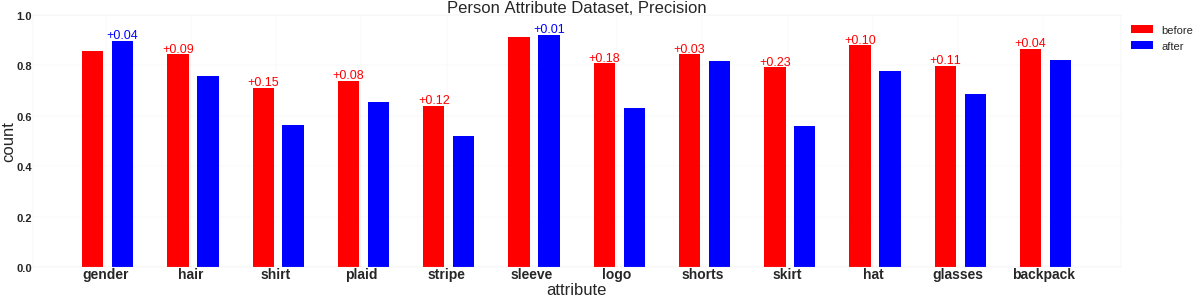

In [22]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,figsize=(120,30), dpi=10)
 
names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
         'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack']
# The position of the bars on the x-axis
r = np.arange(len(names))
 
# Names of group and bar width

barWidth = 0.5
old = old_p[50][:12]
new = new_p[50]

# Create brown bars
plt.bar(r, old, color='red', width=barWidth/2, label="before")
plt.bar(r + barWidth/2 + 0.1, new, color='blue', width=barWidth/2, label="after")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 80})
plt.xticks((r + barWidth/2 - 0.1), names, rotation=0, ha="center",
             rotation_mode="anchor", fontsize=100, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=80, fontweight='bold')
plt.xlabel("attribute", fontsize=120)
plt.ylabel("count", fontsize=120)
plt.title("Person Attribute Dataset, Precision", fontsize=120)
ax.set_ylim(0, 1)
for pos, bp, ap in zip(r, old, new):
    value = bp - ap
    if value > 0:
        ax.text(pos, bp+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='red')
    else:
        ax.text(pos + barWidth/2 + 0.1, ap+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='blue')
# ax.autoscale_view()
fig.tight_layout()

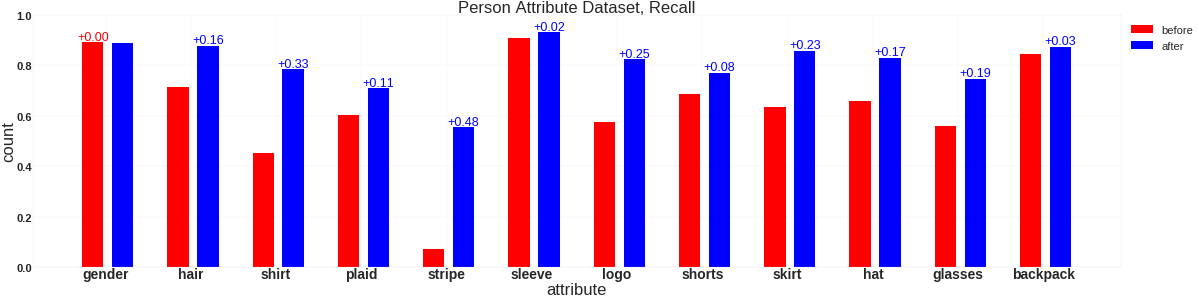

In [23]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,figsize=(120,30), dpi=10)
 
names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
         'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack']
# The position of the bars on the x-axis
r = np.arange(len(names))
 
# Names of group and bar width

barWidth = 0.5
old = old_r[50][:12]
new = new_r[50]
# Create brown bars
plt.bar(r, old, color='red', width=barWidth/2, label="before")
plt.bar(r + barWidth/2 + 0.1, new, color='blue', width=barWidth/2, label="after")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 80})
plt.xticks((r + barWidth/2 - 0.1), names, rotation=0, ha="center",
             rotation_mode="anchor", fontsize=100, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=80, fontweight='bold')
plt.xlabel("attribute", fontsize=120)
plt.ylabel("count", fontsize=120)
plt.title("Person Attribute Dataset, Recall", fontsize=120)
ax.set_ylim(0, 1)
for pos, bp, ap in zip(r, old, new):
    value = bp - ap
    if value > 0:
        ax.text(pos, bp+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='red')
    else:
        ax.text(pos + barWidth/2 + 0.1, ap+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='blue')
# ax.autoscale_view()
fig.tight_layout()

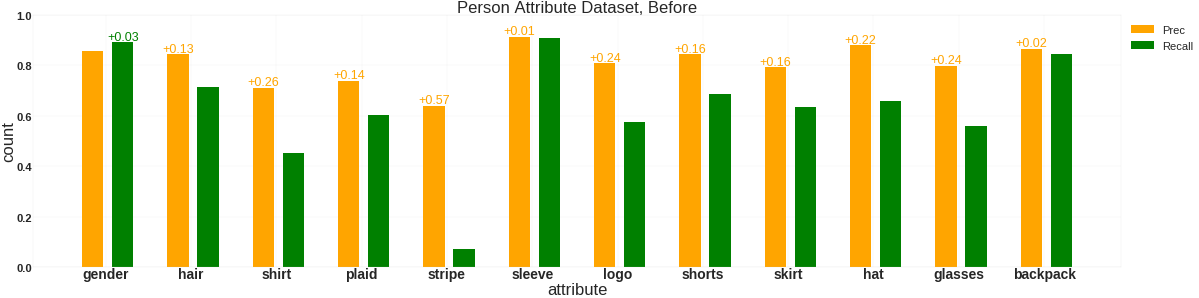

In [65]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,figsize=(120,30), dpi=10)
 
names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
         'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack']
# The position of the bars on the x-axis
r = np.arange(len(names))
 
# Names of group and bar width

barWidth = 0.5
old = old_p[50][:-1]
new = old_r[50][:-1]

# Create brown bars
plt.bar(r, old, color='orange', width=barWidth/2, label="Prec")
plt.bar(r + barWidth/2 + 0.1, new, color='green', width=barWidth/2, label="Recall")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 80})
plt.xticks((r + barWidth/2 - 0.1), names, rotation=0, ha="center",
             rotation_mode="anchor", fontsize=100, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=80, fontweight='bold')
plt.xlabel("attribute", fontsize=120)
plt.ylabel("count", fontsize=120)
plt.title("Person Attribute Dataset, Before", fontsize=120)
ax.set_ylim(0, 1)
for pos, bp, ap in zip(r, old, new):
    value = bp - ap
    if value > 0:
        ax.text(pos, bp+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='orange')
    else:
        ax.text(pos + barWidth/2 + 0.1, ap+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='green')
# ax.autoscale_view()
fig.tight_layout()

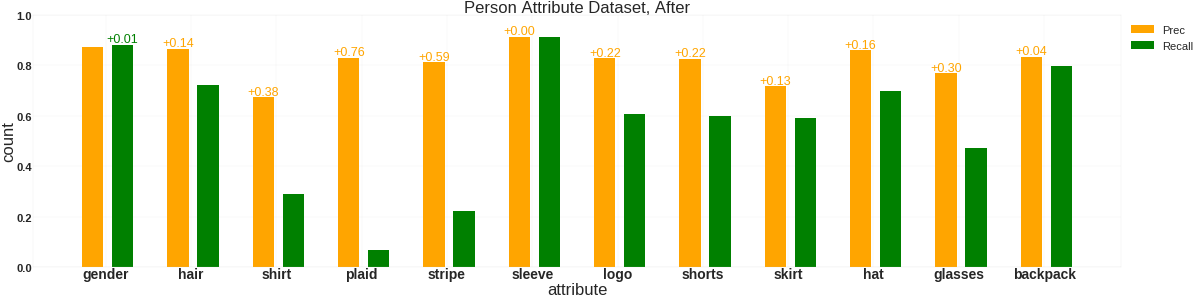

In [66]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(1,figsize=(120,30), dpi=10)
 
names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
         'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack']
# The position of the bars on the x-axis
r = np.arange(len(names))
 
# Names of group and bar width

barWidth = 0.5
old = new_p[50]
new = new_r[50]

# Create brown bars
plt.bar(r, old, color='orange', width=barWidth/2, label="Prec")
plt.bar(r + barWidth/2 + 0.1, new, color='green', width=barWidth/2, label="Recall")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 80})
plt.xticks((r + barWidth/2 - 0.1), names, rotation=0, ha="center",
             rotation_mode="anchor", fontsize=100, fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=80, fontweight='bold')
plt.xlabel("attribute", fontsize=120)
plt.ylabel("count", fontsize=120)
plt.title("Person Attribute Dataset, After", fontsize=120)
ax.set_ylim(0, 1)
for pos, bp, ap in zip(r, old, new):
    value = bp - ap
    if value > 0:
        ax.text(pos, bp+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='orange')
    else:
        ax.text(pos + barWidth/2 + 0.1, ap+0.01, "+{:.2f}".format(abs(value)), fontsize=90, ha='center', color='green')
# ax.autoscale_view()
fig.tight_layout()

In [7]:
fig.savefig('./par_dist.png', dpi = 10)